# Run the whole deltas algorithm

In [14]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [15]:
N1 = 10000
N2 = 10
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-2, -2],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

clf


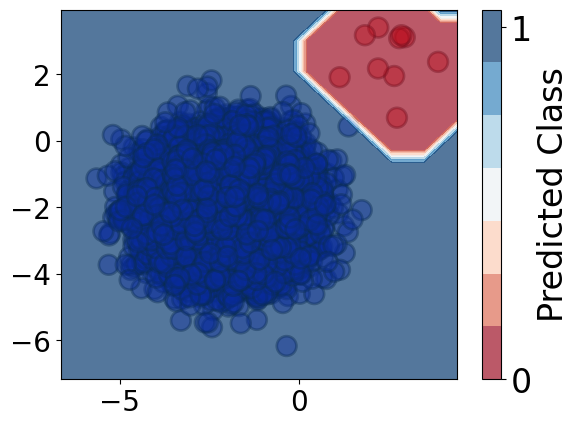

SMOTE


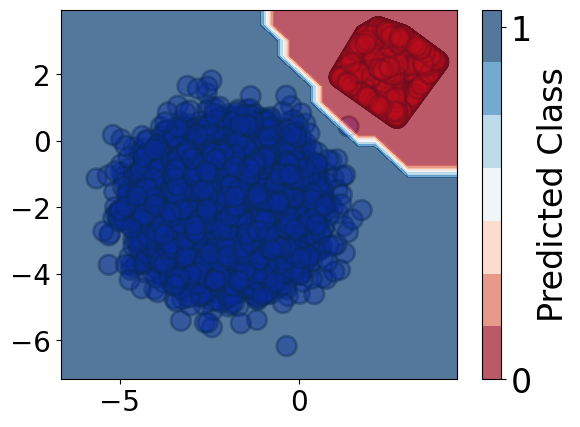

In [16]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)
data_clf['clf'] = classifiers_dict['Original']                      

## Fit deltas

Original Data


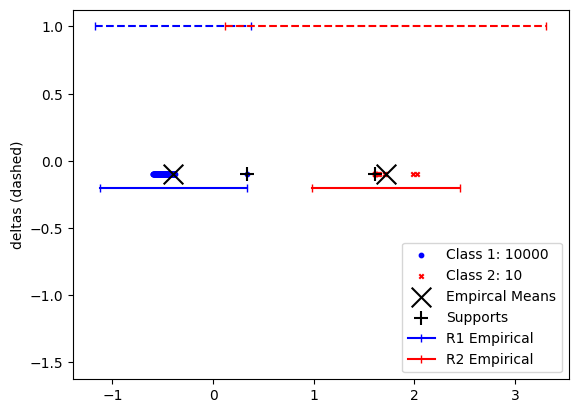

Original dataset is solvable so not downsampling, set 'force_downsample' to 'True' to try and find a lower loss via downsampling anyway
Original Data:


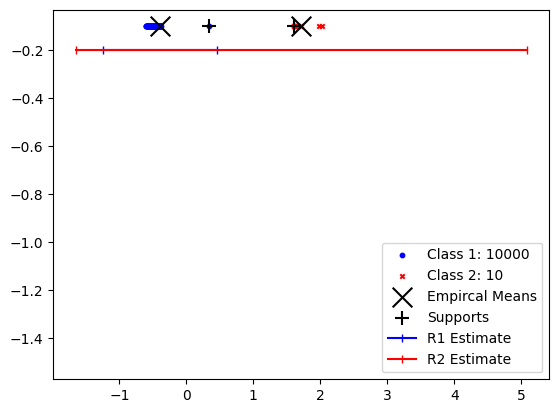

In [17]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, _print=True, _plot=True, max_trials=100000, grid_search=False)

## Plot training data information

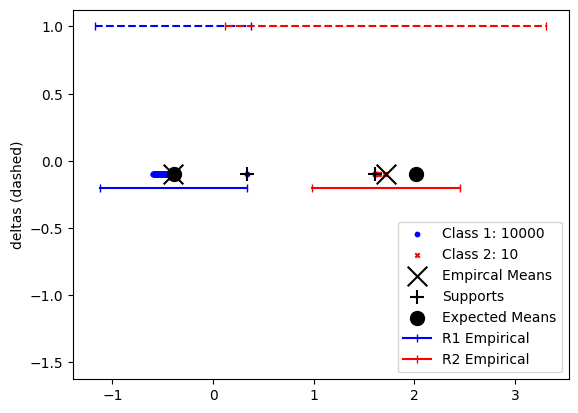

In [18]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [19]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [20]:
deltas_model.print_params()

Parameters
                R:  2.0291763230000184
                N1: 10000
                N2: 10
                R1: 0.7338914043721783
                R2: 0.31177725437418835
                M:  1.2705298294353886
                D:  2.1111463760094478
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.94095
deltas accuracy: 0.50005
SMOTE accuracy: 0.96745

original F1: 0.9372442744035284
deltas F1: 0.6665999799939982
SMOTE F1: 0.9663548503798646

original precision0: 0.8943743851176102
deltas precision0: 0.5555555555555556
SMOTE precision0: 0.9388789784996714

original precision1: 1.0
deltas precision1: 0.5000250112550648
SMOTE precision1: 1.0

original


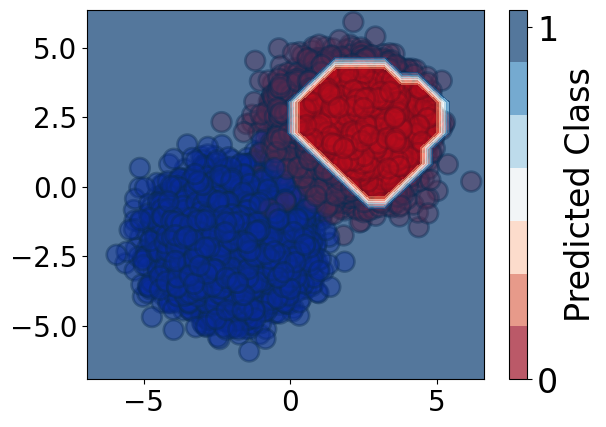

deltas


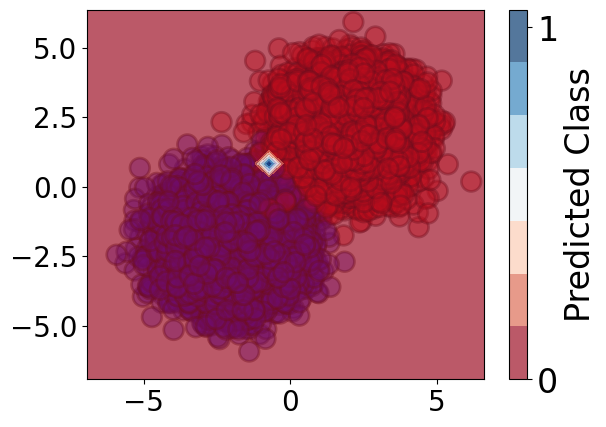

SMOTE


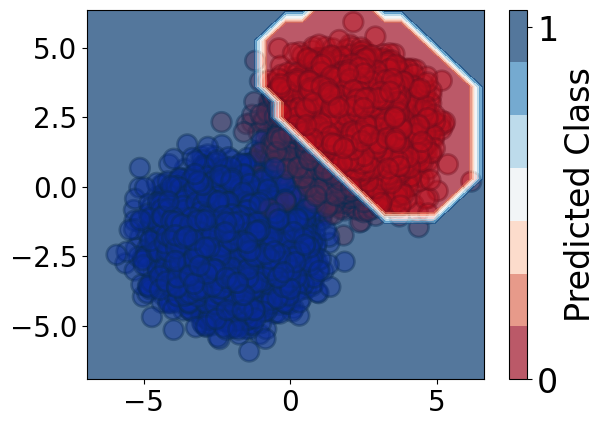

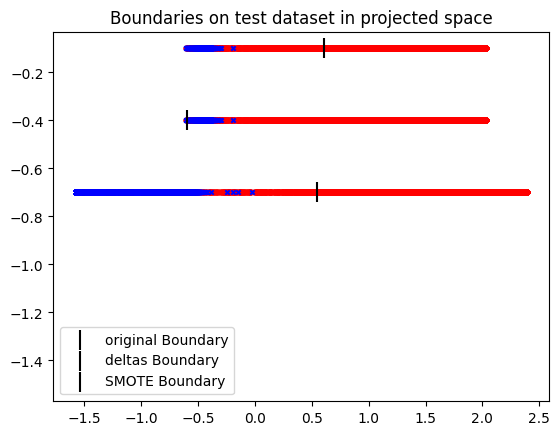

In [21]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)